<a href="https://colab.research.google.com/github/GeneralHassaan/Projects/blob/main/NEURAL_NETWORK_H_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
import seaborn as sns

In [32]:
#Load the data
filename = '/content/train.csv'
df = pd.read_csv(filename)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
#Missing values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [34]:
#checking for duplicates
df.duplicated().sum()

0

In [35]:
df.drop(columns=['Alley','Fence','MiscFeature','PoolArea', 'MiscVal',], inplace=True)

In [36]:
df['FireplaceQu'].fillna('Missing', inplace=True)

In [37]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [38]:
X = df.drop(columns ='SalePrice')

y =df['SalePrice']

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=40)

In [55]:
# Preprocessor
cat_select = make_column_selector(dtype_include='object')
num_select = make_column_selector(dtype_include='number')

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
#Pipelines
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)
# Scaler & OHE
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
#Tuples
num_tuple = (numeric_pipe, num_select)
cat_tuple =(categorical_pipe, cat_select)
#Preprocessor
processor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [40]:
#Process the data
X_train_proc = processor.fit_transform(X_train)
X_test_proc = processor.transform(X_test)

In [42]:
input_shape = X_train.shape[1]
input_shape

75

In [52]:
model = Sequential()
 # How many neurons you have in your first hidden layer
model.add(Dense(10, input_dim=X_train_proc.shape[1],
                activation = 'relu'))
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')


In [53]:
#train the model and save history
history = model.fit(X_train_scl, y_train,
                    validation_data=(X_test_proc,y_test),
                    epochs=10)

Epoch 1/10
35/35 [==============================] - 1s 7ms/step - loss: -61240.3086 - val_loss: -102330.2656
Epoch 2/10
35/35 [==============================] - 0s 4ms/step - loss: -316026.2500 - val_loss: -331846.5938
Epoch 3/10
35/35 [==============================] - 0s 3ms/step - loss: -848660.4375 - val_loss: -786349.6875
Epoch 4/10
35/35 [==============================] - 0s 4ms/step - loss: -1874066.8750 - val_loss: -1621721.1250
Epoch 5/10
35/35 [==============================] - 0s 4ms/step - loss: -3673893.7500 - val_loss: -2996052.7500
Epoch 6/10
35/35 [==============================] - 0s 4ms/step - loss: -6733585.5000 - val_loss: -5422868.5000
Epoch 7/10
35/35 [==============================] - 0s 4ms/step - loss: -11855214.0000 - val_loss: -9258528.0000
Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: -19542290.0000 - val_loss: -14603149.0000
Epoch 9/10
35/35 [==============================] - 0s 3ms/step - loss: -30217534.0000 - val_loss: -21965906

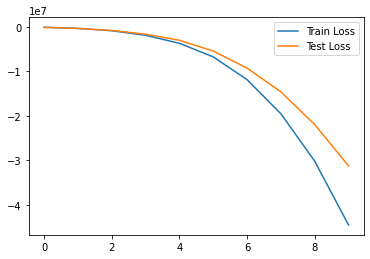

In [54]:
#Visualize the loss
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [46]:
# Early Stopping
#create and compile the model
model2 = keras.Sequential()
model2.add(Dense(10, input_dim=X_train_proc.shape[1],
                activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
model2.add(Dense(1, activation= 'linear'))

model2.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(patience = 5)

In [47]:
#train the model and save history
history = model2.fit(X_train_proc, y_train,
                    validation_data=(X_test_proc,y_test),
                    epochs=200,
                     callbacks=[early_stopping])

Epoch 1/200
35/35 [==============================] - 1s 7ms/step - loss: 39776428032.0000 - val_loss: 36827361280.0000
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 39775670272.0000 - val_loss: 36826091520.0000
Epoch 3/200
35/35 [==============================] - 0s 4ms/step - loss: 39773904896.0000 - val_loss: 36823846912.0000
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 39771041792.0000 - val_loss: 36820414464.0000
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 39766720512.0000 - val_loss: 36815319040.0000
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 39760502784.0000 - val_loss: 36808220672.0000
Epoch 7/200
35/35 [==============================] - 0s 4ms/step - loss: 39752052736.0000 - val_loss: 36798738432.0000
Epoch 8/200
35/35 [==============================] - 0s 3ms/step - loss: 39740891136.0000 - val_loss: 36786454528.0000
Epoch 9/200
35/35 [=============================

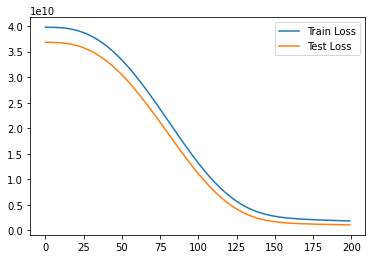

In [48]:
#Visualize the loss
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [49]:
# DROP-OUT
#create and compile the model
model3 = keras.Sequential()
model3.add(Dense(20, input_dim=X_train_proc.shape[1],
                activation = 'relu'))
model3.add(Dropout(.1))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(Dense(1, activation= 'linear'))

model3.compile(optimizer='adam', loss='mse')


In [50]:
#train the model and save history
history = model3.fit(X_train_proc, y_train,
                    validation_data=(X_test_proc,y_test),
                    epochs=70)

Epoch 1/70
35/35 [==============================] - 1s 8ms/step - loss: 39776325632.0000 - val_loss: 36827082752.0000
Epoch 2/70
35/35 [==============================] - 0s 4ms/step - loss: 39775342592.0000 - val_loss: 36825649152.0000
Epoch 3/70
35/35 [==============================] - 0s 4ms/step - loss: 39773233152.0000 - val_loss: 36822712320.0000
Epoch 4/70
35/35 [==============================] - 0s 3ms/step - loss: 39768915968.0000 - val_loss: 36816797696.0000
Epoch 5/70
35/35 [==============================] - 0s 3ms/step - loss: 39760842752.0000 - val_loss: 36806877184.0000
Epoch 6/70
35/35 [==============================] - 0s 4ms/step - loss: 39748222976.0000 - val_loss: 36791590912.0000
Epoch 7/70
35/35 [==============================] - 0s 4ms/step - loss: 39728779264.0000 - val_loss: 36769648640.0000
Epoch 8/70
35/35 [==============================] - 0s 5ms/step - loss: 39701581824.0000 - val_loss: 36739289088.0000
Epoch 9/70
35/35 [==============================] - 0s 4

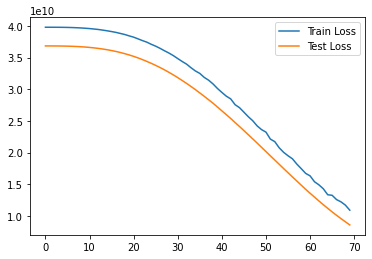

In [51]:
#Visualize the loss
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();